# Prepare the environments for this set of experiments

In [2]:
import sys
sys.path.append('../../')
from panav.viz import draw_hybrid

from env_create import load_env_N
import pickle as pkl

%load_ext autoreload
%autoreload 2

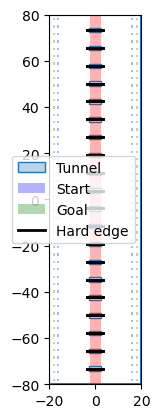

In [18]:
# Multi Tunnel
from panav.hybrid import MultiTunnelHG

bloating_r = 0.5

N = 100
limits = [(-20,20),(-80,80)] 
n_tunnel = 20

specs = dict(n_tunnel = n_tunnel, 
            tunnel_width = bloating_r*3.9,
            limits=limits,
            wallthickness = 5.0,
            bloating_r = bloating_r)

env_name = 'MultiTunnel'
import numpy as np
N_range = np.arange(10,101,10)
# N_range = np.arange(10,21,10)
for N in N_range:
    HG = MultiTunnelHG(**specs,N_agent=N)
    with open(f'envs/{env_name}{N}.pkl','wb') as fp:
        pkl.dump(HG,fp)

from env_create import load_env_N
with open(f'envs/{env_name}.pkl','wb') as fp:
    pkl.dump({'specs':dict(path_to_env=f'envs/{env_name}'),'constructor':load_env_N},fp)

draw_hybrid(HG,
            display_node=False)


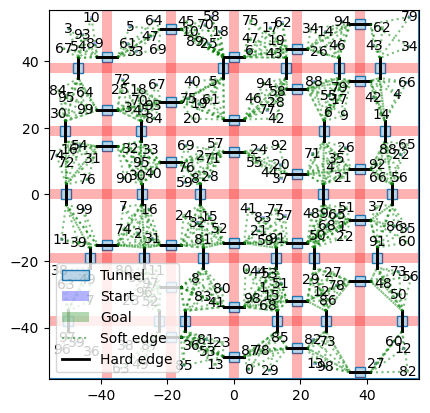

In [16]:
from matplotlib import pyplot as plt
from panav.hybrid import RoomHGBuilder
# Room Simplified


n_agents = list(range(1,41,10))
bloating_r = 0.5

specs = dict(   n_row = 6,
                n_col = 6,
                cell_width = 16.0,
                cell_height = 16.0,
                wallthickness = 3.0,
                gap_width = 3.0,
                start_goal_dist = 30.0,
                bloating_r = bloating_r)

       

HG = RoomHGBuilder(**specs, N_agent=100)
draw_hybrid(HG,display_soft=True,show_agent_ID=True,display_node=False)



In [17]:
from env_create import load_room
import pickle as pkl

env_info = {'specs':{'path_to_base_room':'./baseRoom.pkl'},'constructor':load_room}
with open(env_info['specs']['path_to_base_room'],'wb') as fp:
    pkl.dump(HG,fp)
env_name = 'Room'
with open('./envs/{}.pkl'.format(env_name),'wb') as f:
    pkl.dump(env_info,f)

/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/shapely/measurement.py:74: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


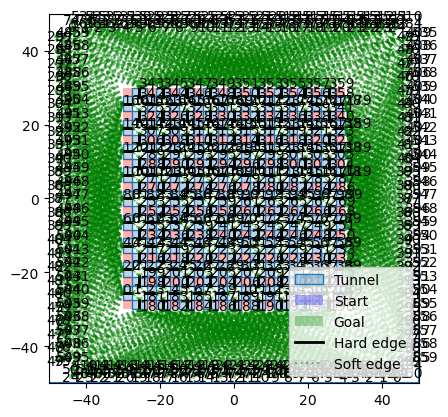

In [8]:
from panav.hybrid import WareHouseHGBuilder
# Warehouse

bloating_r = 0.5
vmax = 1.0

N = 100

limits = [(-50,50),(-50,50)] 

specs = dict(limits = limits, 
                shelf_region_x_limit=[-30,30], 
                shelf_region_y_limit=[-30,30],
                obs_x_margin = 8.0 * bloating_r,
                obs_y_margin = 8.0 * bloating_r,
                
                n_col = 10,
                n_row = 10,

                corner_padding_x = bloating_r * 11,
                corner_padding_y = bloating_r * 11,
                bloating_r = bloating_r,
                tunnel_endpoint_buffer = 0.05)

env_name = 'WareHouse'
import numpy as np
N_range = np.arange(10,101,10)
# N_range = np.arange(10,21,10)
for N in N_range:
    HG = WareHouseHGBuilder(**specs,N_agent=N)
    with open(f'envs/{env_name}{N}.pkl','wb') as fp:
        pkl.dump(HG,fp)

from env_create import load_env_N
with open(f'envs/{env_name}.pkl','wb') as fp:
    pkl.dump({'specs':dict(path_to_env=f'envs/{env_name}'),'constructor':load_env_N},fp)


draw_hybrid(HG,show_agent_ID=True,display_node=True,display_soft=True)

In [11]:
from env_create import load_env_N
with open(f'envs/{env_name}.pkl','wb') as fp:
    pkl.dump({'specs':dict(path_to_env=f'envs/{env_name}'),'constructor':load_env_N},fp)
